In [1]:
import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt

## Import the clean datasets

In [2]:
rain = pd.read_csv('rain_clean.csv')
crashes = pd.read_csv('accidents_clean.csv')

## Drop the columns containing previous indexes

In [3]:
cols = [0,1]
rain.drop(rain.columns[cols],axis=1,inplace=True)
rain.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,NaN,2017,1,1
1,2017-01-02,0.0,22.0,2.2,9.4,14:30,NaN,NaN,NaN,NaN,NaN,2017,1,2
2,2017-01-03,0.0,34.0,2.8,7.2,08:10,NaN,NaN,NaN,NaN,NaN,2017,1,3
3,2017-01-04,0.0,27.0,2.2,6.7,15:10,NaN,NaN,NaN,NaN,NaN,2017,1,4
4,2017-01-05,0.0,34.0,1.7,7.5,10:00,NaN,NaN,NaN,NaN,NaN,2017,1,5


In [4]:
cols = [0]
crashes.drop(crashes.columns[cols],axis=1,inplace=True)
crashes.head()

,Numero_expedient,Nom_districte,Dia_setmana,Tipus_dia,Any,Mes,Nom_mes,Dia_mes,Torn,Hora,Causa,Vehicle_implicat,Sexe,Edat,Persona_afectada,Victima,Data
0,2017S000001,Sarrià-Sant Gervasi,Diumenge,Laboral,2017,1,Gener,1,Nit,4,No és causa del vianant,Turismo,Home,50.0,Conductor,Ferit lleu,2017-01-01
1,2017S000002,Eixample,Diumenge,Laboral,2017,1,Gener,1,Nit,2,No és causa del vianant,Motocicleta,Home,47.0,Conductor,Ferit lleu,2017-01-01
2,2017S000004,Eixample,Diumenge,Laboral,2017,1,Gener,1,Matí,7,No és causa del vianant,Motocicleta,Dona,27.0,Conductor,Ferit lleu,2017-01-01
3,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,Gener,1,Matí,7,No és causa del vianant,Ciclomotor,Dona,40.0,Passatger,Ferit lleu,2017-01-01
4,2017S000005,Sant Martí,Diumenge,Laboral,2017,1,Gener,1,Matí,7,No és causa del vianant,Ciclomotor,Home,37.0,Conductor,Ferit lleu,2017-01-01


## Merge both datasets

In [5]:
rain_bcn = rain.merge(crashes.set_index('Data'), on='Data', suffixes=('_Ra', '_Cr'))
rain_bcn.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,...,Nom_mes,Dia_mes,Torn,Hora,Causa,Vehicle_implicat,Sexe,Edat,Persona_afectada,Victima
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,...,Gener,1,Nit,4,No és causa del vianant,Turismo,Home,50.0,Conductor,Ferit lleu
1,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,...,Gener,1,Nit,2,No és causa del vianant,Motocicleta,Home,47.0,Conductor,Ferit lleu
2,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,...,Gener,1,Matí,7,No és causa del vianant,Motocicleta,Dona,27.0,Conductor,Ferit lleu
3,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,...,Gener,1,Matí,7,No és causa del vianant,Ciclomotor,Dona,40.0,Passatger,Ferit lleu
4,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,...,Gener,1,Matí,7,No és causa del vianant,Ciclomotor,Home,37.0,Conductor,Ferit lleu


## Drop the duplicate columns

In [6]:
rain_bcn.drop(columns=['Any_Cr', 'Mes_Cr'], inplace=True)

In [7]:
rain_bcn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24002 entries, 0 to 24001
Data columns (total 28 columns):
Data                24002 non-null object
prec                23961 non-null float64
dir                 23979 non-null float64
velmedia            24002 non-null float64
racha               23979 non-null float64
horaracha           23979 non-null object
tmed                18326 non-null float64
tmin                18326 non-null float64
horatmin            18297 non-null object
tmax                18326 non-null float64
horatmax            18279 non-null object
Any_Ra              24002 non-null int64
Mes_Ra              24002 non-null int64
Dia                 24002 non-null int64
Numero_expedient    24002 non-null object
Nom_districte       24002 non-null object
Dia_setmana         24002 non-null object
Tipus_dia           24002 non-null object
Nom_mes             24002 non-null object
Dia_mes             24002 non-null int64
Torn                24002 non-null object
Hora  

## Next steps are intended to create a DataFrame that counts 'Numero_expedient' values per 'Data' without duplicates

In [8]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27]
count_accidents = rain_bcn.drop(rain_bcn.columns[cols],axis=1)

In [9]:
count_accidents.drop_duplicates(inplace=True)

In [10]:
num_accidents_dia = count_accidents.groupby(['Data']).count()

## Creation of a new column 'Data' based on index to be able to join it by date after.

In [11]:
num_accidents_dia['Data'] = num_accidents_dia.index

In [12]:
num_accidents_dia.head()

,Numero_expedient,Data
Data,,
2017-01-01,18,2017-01-01
2017-01-02,18,2017-01-02
2017-01-03,27,2017-01-03
2017-01-04,25,2017-01-04
2017-01-05,29,2017-01-05


## Joining the 2 dataframes I was working with to add the number of crashes to weather conditions  

In [13]:
rain_crash = rain.join(num_accidents_dia.set_index('Data'), on='Data')
rain_crash.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia,Numero_expedient
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,NaN,2017,1,1,18
1,2017-01-02,0.0,22.0,2.2,9.4,14:30,NaN,NaN,NaN,NaN,NaN,2017,1,2,18
2,2017-01-03,0.0,34.0,2.8,7.2,08:10,NaN,NaN,NaN,NaN,NaN,2017,1,3,27
3,2017-01-04,0.0,27.0,2.2,6.7,15:10,NaN,NaN,NaN,NaN,NaN,2017,1,4,25
4,2017-01-05,0.0,34.0,1.7,7.5,10:00,NaN,NaN,NaN,NaN,NaN,2017,1,5,29


## Rename the column to better understand it refers to crashes

In [14]:
rain_crash.rename(columns={"Numero_expedient": "Num_accidents"}, inplace=True)

In [15]:
rain_crash.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia,Num_accidents
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,NaN,2017,1,1,18
1,2017-01-02,0.0,22.0,2.2,9.4,14:30,NaN,NaN,NaN,NaN,NaN,2017,1,2,18
2,2017-01-03,0.0,34.0,2.8,7.2,08:10,NaN,NaN,NaN,NaN,NaN,2017,1,3,27
3,2017-01-04,0.0,27.0,2.2,6.7,15:10,NaN,NaN,NaN,NaN,NaN,2017,1,4,25
4,2017-01-05,0.0,34.0,1.7,7.5,10:00,NaN,NaN,NaN,NaN,NaN,2017,1,5,29


## Bin rain measures to have clearer graphs

In [16]:
bins = [0, 8, 30, 1000]
labels = ['No rain', 'Light rain', 'Heavy rain']
rain_crash['vol_pluja'] = pd.cut(rain_crash['prec'], bins=bins, labels=labels, include_lowest=True)
print (rain_crash)

           Data  prec   dir  velmedia  racha horaracha  tmed  tmin horatmin  \
0    2017-01-01   0.0  28.0       1.9    6.1     20:00   NaN   NaN      NaN   
1    2017-01-02   0.0  22.0       2.2    9.4     14:30   NaN   NaN      NaN   
2    2017-01-03   0.0  34.0       2.8    7.2     08:10   NaN   NaN      NaN   
3    2017-01-04   0.0  27.0       2.2    6.7     15:10   NaN   NaN      NaN   
4    2017-01-05   0.0  34.0       1.7    7.5     10:00   NaN   NaN      NaN   
..          ...   ...   ...       ...    ...       ...   ...   ...      ...   
725  2018-12-27   0.0  33.0       2.2    5.3     09:20  12.0   8.6    23:59   
726  2018-12-28   0.0  36.0       1.9    5.3     22:10  10.7   6.6    06:20   
727  2018-12-29   0.0  35.0       2.2    6.4     05:40  10.3   6.2    07:10   
728  2018-12-30   0.0  35.0       2.5    6.7     23:10  11.4   5.1    07:00   
729  2018-12-31   0.0  35.0       2.8    7.5     01:00  11.8   6.5    08:00   

     tmax horatmax   Any  Mes  Dia  Num_accidents v

## Bining of wind speed to create clearer graphs

In [17]:
bins = [0, 4.5, 7, 100]
labels = ['No windy', 'Slightly windy', 'Heavy windy']
rain_crash['vent_dia'] = pd.cut(rain_crash['velmedia'], bins=bins, labels=labels, include_lowest=True)
rain_crash.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia,Num_accidents,vol_pluja,vent_dia
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,NaN,2017,1,1,18,No rain,No windy
1,2017-01-02,0.0,22.0,2.2,9.4,14:30,NaN,NaN,NaN,NaN,NaN,2017,1,2,18,No rain,No windy
2,2017-01-03,0.0,34.0,2.8,7.2,08:10,NaN,NaN,NaN,NaN,NaN,2017,1,3,27,No rain,No windy
3,2017-01-04,0.0,27.0,2.2,6.7,15:10,NaN,NaN,NaN,NaN,NaN,2017,1,4,25,No rain,No windy
4,2017-01-05,0.0,34.0,1.7,7.5,10:00,NaN,NaN,NaN,NaN,NaN,2017,1,5,29,No rain,No windy


## Create a dataframe to proper show the results by binning of rain measures

In [18]:
mean_crashes = rain_crash.groupby('vol_pluja').mean().reset_index()
mean_crashes

,vol_pluja,prec,dir,velmedia,racha,tmed,tmin,tmax,Any,Mes,Dia,Num_accidents
0,No rain,0.410920,24.542446,3.417672,9.418129,18.494925,15.452444,21.537406,2017.488506,6.534483,15.640805,25.349138
1,Light rain,16.769231,18.192308,4.438462,13.461538,16.360000,13.295000,19.415000,2017.769231,6.307692,17.192308,27.615385
2,Heavy rain,55.157143,18.428571,3.942857,13.000000,16.716667,14.283333,19.166667,2017.571429,7.142857,19.285714,32.428571


Text(0.5, 1.0, 'Traffic Collisions in Barcelona depending on Rain')

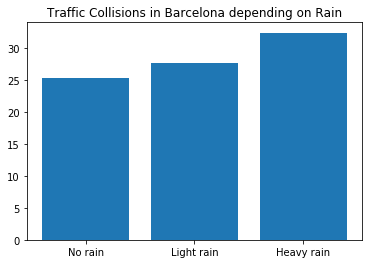

In [19]:
plt.bar(mean_crashes.vol_pluja, mean_crashes.Num_accidents)
plt.title("Traffic Collisions in Barcelona depending on Rain")

In [20]:
wind_crashes = rain_crash.groupby('vent_dia').mean().reset_index()
wind_crashes

,vent_dia,prec,dir,velmedia,racha,tmed,tmin,tmax,Any,Mes,Dia,Num_accidents
0,No windy,1.159283,25.423453,3.017073,8.787622,18.206709,15.102516,21.311950,2017.504065,6.645528,15.658537,25.648780
1,Slightly windy,3.378947,19.600000,5.296842,13.362105,19.736232,17.028986,22.434783,2017.463158,6.094737,15.863158,25.021053
2,Heavy windy,3.765000,9.750000,8.290000,16.580000,17.230769,14.961538,19.500000,2017.550000,4.900000,16.950000,23.600000


<BarContainer object of 3 artists>

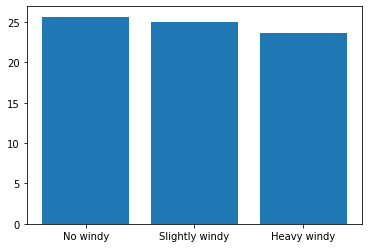

In [21]:
plt.bar(wind_crashes.vent_dia, wind_crashes.Num_accidents)

In [22]:
only_rain = rain_crash[rain_crash['prec'] > 5.0]
only_rain.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia,Num_accidents,vol_pluja,vent_dia
21,2017-01-22,5.8,2.0,6.7,16.4,05:10,NaN,NaN,NaN,NaN,NaN,2017,1,22,9,No rain,Slightly windy
26,2017-01-27,8.1,9.0,3.6,12.5,21:10,NaN,NaN,NaN,NaN,NaN,2017,1,27,31,Light rain,No windy
37,2017-02-07,7.3,11.0,1.9,18.1,23:10,NaN,NaN,NaN,NaN,NaN,2017,2,7,29,No rain,No windy
61,2017-03-03,10.2,8.0,4.4,12.2,22:10,NaN,NaN,NaN,NaN,NaN,2017,3,3,32,Light rain,No windy
82,2017-03-24,81.9,25.0,2.8,11.1,22:00,NaN,NaN,NaN,NaN,NaN,2017,3,24,49,Heavy rain,No windy


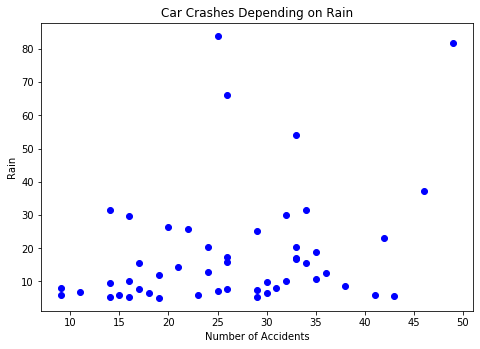

In [23]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(only_rain.Num_accidents, only_rain.prec, color='b')
#ax.scatter(rain_crash.Num_accidents, rain_crash.vent_dia, color='b')
ax.set_xlabel('Number of Accidents')
ax.set_ylabel('Rain')
ax.set_title('Car Crashes Depending on Rain')
plt.show()

In [24]:
rain_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 17 columns):
Data             730 non-null object
prec             729 non-null float64
dir              729 non-null float64
velmedia         730 non-null float64
racha            729 non-null float64
horaracha        729 non-null object
tmed             559 non-null float64
tmin             559 non-null float64
horatmin         558 non-null object
tmax             559 non-null float64
horatmax         558 non-null object
Any              730 non-null int64
Mes              730 non-null int64
Dia              730 non-null int64
Num_accidents    730 non-null int64
vol_pluja        729 non-null category
vent_dia         730 non-null category
dtypes: category(2), float64(7), int64(4), object(4)
memory usage: 87.3+ KB


## Count by vehicle

In [25]:
cols = [1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,24,25,26,27]
veh_accidents = rain_bcn.drop(rain_bcn.columns[cols],axis=1)
veh_accidents.head()

,Data,Numero_expedient,Vehicle_implicat
0,2017-01-01,2017S000001,Turismo
1,2017-01-01,2017S000002,Motocicleta
2,2017-01-01,2017S000004,Motocicleta
3,2017-01-01,2017S000005,Ciclomotor
4,2017-01-01,2017S000005,Ciclomotor


## Join the two wheel motorized vehicles as motorbikes

In [26]:
veh_accidents.replace({'Motocicleta':'Moto', 'Ciclomotor': 'Moto'}, inplace=True)
veh_accidents.head(10)


,Data,Numero_expedient,Vehicle_implicat
0,2017-01-01,2017S000001,Turismo
1,2017-01-01,2017S000002,Moto
2,2017-01-01,2017S000004,Moto
3,2017-01-01,2017S000005,Moto
4,2017-01-01,2017S000005,Moto
5,2017-01-01,2017S000006,Bicicleta
6,2017-01-01,2017S000008,Moto
7,2017-01-01,2017S000008,Moto
8,2017-01-01,2017S000009,Moto
9,2017-01-01,2017S000010,Autobús


## Drop the duplicates of number of expedient and vehicle involved, because they are refered to several injured people but we only want to know the crashes, not people

In [27]:
veh_accidents.drop_duplicates(inplace=True)

## Group by Date and kind of vehicle

In [28]:
accidents_moto_dia = veh_accidents.groupby(['Data', 'Vehicle_implicat']).count()
accidents_moto_dia.head(5)

Numero_expedient
Data       Vehicle_implicat                  
2017-01-01 Autobús                          3
           Bicicleta                        3
           Moto                             9
           Turismo                          3
2017-01-02 Camión <= 3,5 Tm                 1

In [29]:
veh_accidents.head()

,Data,Numero_expedient,Vehicle_implicat
0,2017-01-01,2017S000001,Turismo
1,2017-01-01,2017S000002,Moto
2,2017-01-01,2017S000004,Moto
3,2017-01-01,2017S000005,Moto
5,2017-01-01,2017S000006,Bicicleta


In [30]:
accidents_moto_dia = veh_accidents.groupby(['Data', 'Vehicle_implicat']).count()
accidents_moto_dia.head()

Numero_expedient
Data       Vehicle_implicat                  
2017-01-01 Autobús                          3
           Bicicleta                        3
           Moto                             9
           Turismo                          3
2017-01-02 Camión <= 3,5 Tm                 1

## Create a dataframe of only motorbikes in order to merge it with the main dataframe

In [31]:
accidents_moto_dia = accidents_moto_dia.query('Vehicle_implicat == "Moto"')
accidents_moto_dia.head()

,,Numero_expedient
Data,Vehicle_implicat,
2017-01-01,Moto,9
2017-01-02,Moto,9
2017-01-03,Moto,19
2017-01-04,Moto,18
2017-01-05,Moto,25


## Change the name of column in order to turn in meaningful in the main dataframe 

In [32]:
accidents_moto_dia.rename(columns={"Numero_expedient": "Accidents_moto"}, inplace=True)

In [33]:
accidents_moto_dia = accidents_moto_dia.reset_index()
accidents_moto_dia.head()

,Data,Vehicle_implicat,Accidents_moto
0,2017-01-01,Moto,9
1,2017-01-02,Moto,9
2,2017-01-03,Moto,19
3,2017-01-04,Moto,18
4,2017-01-05,Moto,25


## Join of the motorbike info with the main dataframe

In [36]:
rain_crash = rain_crash.merge(accidents_moto_dia, on='Data')

In [39]:
rain_crash.drop(columns=['Vehicle_implicat'], inplace=True)
rain_crash.head()

,Data,prec,dir,velmedia,racha,horaracha,tmed,tmin,horatmin,tmax,horatmax,Any,Mes,Dia,Num_accidents,vol_pluja,vent_dia,Accidents_moto
0,2017-01-01,0.0,28.0,1.9,6.1,20:00,NaN,NaN,NaN,NaN,NaN,2017,1,1,18,No rain,No windy,9
1,2017-01-02,0.0,22.0,2.2,9.4,14:30,NaN,NaN,NaN,NaN,NaN,2017,1,2,18,No rain,No windy,9
2,2017-01-03,0.0,34.0,2.8,7.2,08:10,NaN,NaN,NaN,NaN,NaN,2017,1,3,27,No rain,No windy,19
3,2017-01-04,0.0,27.0,2.2,6.7,15:10,NaN,NaN,NaN,NaN,NaN,2017,1,4,25,No rain,No windy,18
4,2017-01-05,0.0,34.0,1.7,7.5,10:00,NaN,NaN,NaN,NaN,NaN,2017,1,5,29,No rain,No windy,25


In [53]:
moto_crashes = rain_crash.groupby(['vol_pluja']).sum().reset_index()
moto_crashes.head()

,vol_pluja,prec,dir,velmedia,racha,tmed,tmin,tmax,Any,Mes,Dia,Num_accidents,Accidents_moto
0,No rain,286.0,17057.0,2378.7,6545.6,9839.3,8220.7,11457.9,1404172,4548,10886,17643,11375
1,Light rain,436.0,473.0,115.4,350.0,327.2,265.9,388.3,52462,164,447,718,440
2,Heavy rain,386.1,129.0,27.6,91.0,100.3,85.7,115.0,14123,50,135,227,132


In [57]:
moto_crashes = moto_crashes.assign(Altres_accidents=lambda x: (moto_crashes['Num_accidents'] - moto_crashes['Accidents_moto']))

moto_crashes.head()

,vol_pluja,prec,dir,velmedia,racha,tmed,tmin,tmax,Any,Mes,Dia,Num_accidents,Accidents_moto,Altres_accidents
0,No rain,286.0,17057.0,2378.7,6545.6,9839.3,8220.7,11457.9,1404172,4548,10886,17643,11375,6268
1,Light rain,436.0,473.0,115.4,350.0,327.2,265.9,388.3,52462,164,447,718,440,278
2,Heavy rain,386.1,129.0,27.6,91.0,100.3,85.7,115.0,14123,50,135,227,132,95
